<a href="https://colab.research.google.com/github/harsha-9977/AIML/blob/main/30_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms

# Download and transform the data
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 39.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.05MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.89MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.87MB/s]


In [2]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Model (simple example)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8764 - loss: 0.4311 - val_accuracy: 0.9587 - val_loss: 0.1378
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9653 - loss: 0.1178 - val_accuracy: 0.9700 - val_loss: 0.1028
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9764 - loss: 0.0793 - val_accuracy: 0.9707 - val_loss: 0.0882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9843 - loss: 0.0546 - val_accuracy: 0.9757 - val_loss: 0.0803
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9868 - loss: 0.0442 - val_accuracy: 0.9756 - val_loss: 0.0800


In [3]:
# ✅ Step 1: Install PyTorch (Colab has it pre-installed)
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ✅ Step 2: Define data loaders
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# ✅ Step 3: Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),  # 28x28 -> 28x28
            nn.ReLU(),
            nn.MaxPool2d(2, 2),              # 28x28 -> 14x14
            nn.Conv2d(16, 32, 3, padding=1), # 14x14 -> 14x14
            nn.ReLU(),
            nn.MaxPool2d(2, 2),              # 14x14 -> 7x7
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

# ✅ Step 4: Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ✅ Step 5: Training loop
for epoch in range(1, 4):  # Train for 3 epochs
    model.train()
    for batch in train_loader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch} complete")

# ✅ Step 6: Evaluate on test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\n✅ Test Accuracy: {100 * correct / total:.2f}%")


Epoch 1 complete
Epoch 2 complete
Epoch 3 complete

✅ Test Accuracy: 98.76%


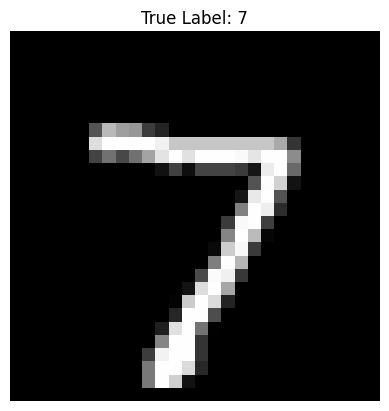

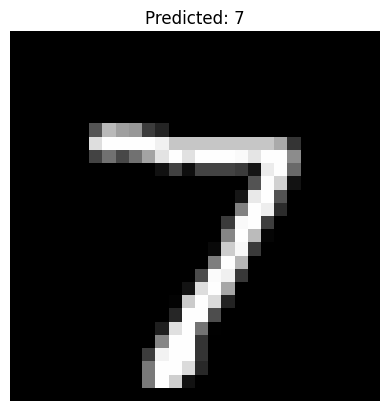

In [4]:
import matplotlib.pyplot as plt

# Get a sample image from the test set
images, labels = next(iter(test_loader))
image = images[0]
label = labels[0]

# Show the original image
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True Label: {label.item()}")
plt.axis('off')
plt.show()

# Move to device and predict
image = image.unsqueeze(0).to(device)
model.eval()
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)

# Show prediction result
plt.imshow(image.cpu().squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted.item()}")
plt.axis('off')
plt.show()


100%|██████████| 26.4M/26.4M [00:01<00:00, 16.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.02MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.63MB/s]
100%|██████████| 170M/170M [00:08<00:00, 20.6MB/s]
100%|██████████| 169M/169M [00:04<00:00, 36.1MB/s]


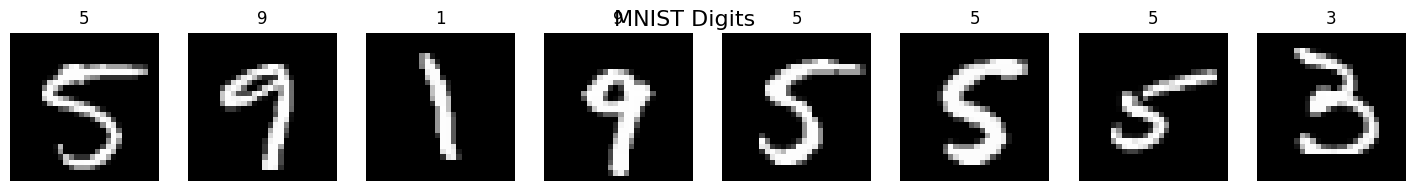

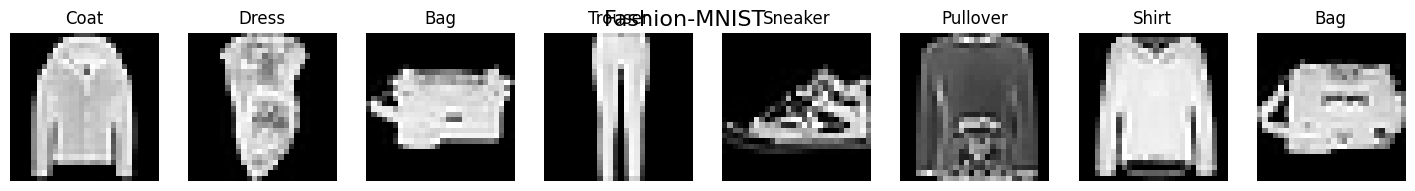

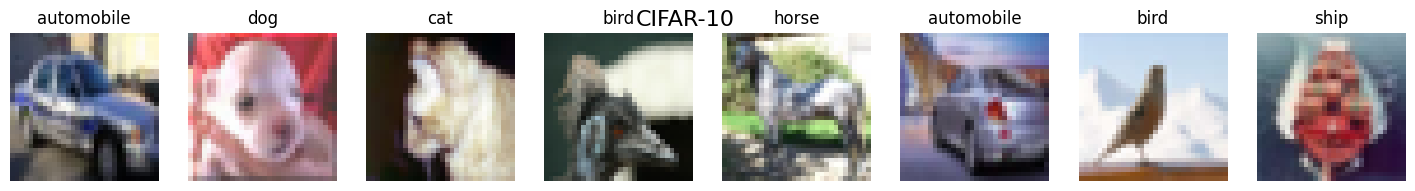

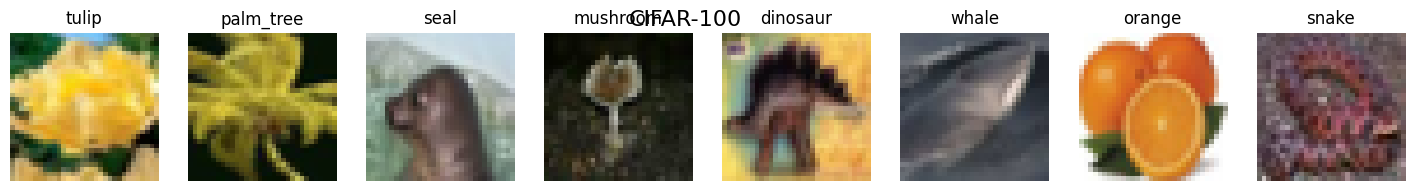

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# ✅ Common image transform
transform_mnist = transforms.ToTensor()
transform_cifar = transforms.Compose([
    transforms.ToTensor(),
])

# ✅ Dataset loaders
datasets_info = {
    "MNIST Digits": torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_mnist),
    "Fashion-MNIST": torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform_mnist),
    "CIFAR-10": torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cifar),
    "CIFAR-100": torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_cifar),
}

# ✅ Class labels for each dataset
class_labels = {
    "MNIST Digits": list(map(str, range(10))),
    "Fashion-MNIST": [
        "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ],
    "CIFAR-10": [
        "airplane", "automobile", "bird", "cat", "deer",
        "dog", "frog", "horse", "ship", "truck"
    ],
    "CIFAR-100": torchvision.datasets.CIFAR100(root='./data', download=True).classes[:100]
}

# ✅ Visualize one batch per dataset
def show_images(dataset_name, dataset, class_names):
    loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)
    images, labels = next(iter(loader))

    # Unnormalize if needed (optional)
    fig, axes = plt.subplots(1, 8, figsize=(18, 2))
    for i in range(8):
        img = images[i].squeeze()
        if img.ndim == 2:
            axes[i].imshow(img, cmap='gray')
        else:
            axes[i].imshow(img.permute(1, 2, 0))
        axes[i].set_title(class_names[labels[i]])
        axes[i].axis('off')
    plt.suptitle(dataset_name, fontsize=16)
    plt.show()

# ✅ Run for all
for name, dataset in datasets_info.items():
    show_images(name, dataset, class_labels[name])


Epoch 1 Loss: 1.3523
Epoch 2 Loss: 0.9727
Epoch 3 Loss: 0.8104


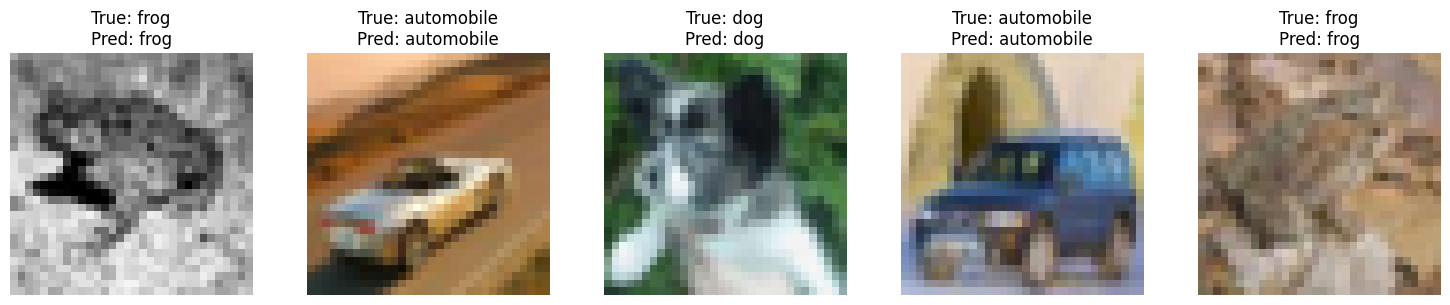

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

# ✅ Step 1: Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalize to [-1, 1]
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = trainset.classes  # List of class names

# ✅ Step 2: Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 32x16x16
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 64x8x8
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

# ✅ Step 3: Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(3):  # Train for 3 epochs
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1} Loss: {running_loss/len(trainloader):.4f}")

# ✅ Step 4: Predict 5 random images from test set
model.eval()
indices = random.sample(range(len(testset)), 5)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, idx in enumerate(indices):
    image, label = testset[idx]
    input_tensor = image.unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)

    # Unnormalize image
    img = image * 0.5 + 0.5  # Convert back to [0, 1]
    img = img.permute(1, 2, 0).numpy()

    axes[i].imshow(img)
    axes[i].set_title(f"True: {classes[label]}\nPred: {classes[predicted.item()]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import random

# ✅ Step 1: Data Transform
transform = transforms.Compose([
    transforms.Resize(224),  # Required for ResNet
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = trainset.classes

# ✅ Step 2: Load Pretrained ResNet18
model = models.resnet18(pretrained=True)

# Replace the final layer (1000 → 10)
model.fc = nn.Linear(model.fc.in_features, 10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# ✅ Step 3: Training Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)

# ✅ Step 4: Train the model (3 epochs)
for epoch in range(3):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {running_loss / len(trainloader):.4f}")

# ✅ Step 5: Predict 5 Random Test Images
model.eval()
indices = random.sample(range(len(testset)), 5)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, idx in enumerate(indices):
    image, label = testset[idx]
    input_tensor = image.unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)

    # Unnormalize image
    img = image * 0.5 + 0.5
    img = img.permute(1, 2, 0).numpy()

    axes[i].imshow(img)
    axes[i].set_title(f"True: {classes[label]}\nPred: {classes[predicted.item()]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]


KeyboardInterrupt: 

TensorFlow

In [ ]:
!pip install -q tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

# ✅ Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# ✅ Step 2: Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# ✅ Step 3: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Step 4: Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ✅ Step 5: Predict and show 5 random test images
indices = random.sample(range(len(x_test)), 5)
images = x_test[indices]
labels = y_test[indices].flatten()

predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# ✅ Step 6: Plot
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.show()
